In [1]:
# Importing necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm
from itertools import combinations
from statsmodels.stats.outliers_influence import variance_inflation_factor
sns.set()

C:\Users\ASUS\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
# Reading the data

df_init= pd.read_excel('Concrete_Data.xls')
df= df_init.copy()

df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [3]:
# changing the column names for easier reading
df.columns= ['Cement', 'Blast','Fly Ash', 'Water', 'Superplasticizer',
             'Coarse Aggregate', 'Fine Aggregate', 'Age', 'Concrete Strength']

df.head()

,Cement,Blast,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [4]:
# Extracting the null values counts
df.isnull().sum()

Cement               0
Blast                0
Fly Ash              0
Water                0
Superplasticizer     0
Coarse Aggregate     0
Fine Aggregate       0
Age                  0
Concrete Strength    0
dtype: int64

In [5]:
df['Age'].unique()

array([ 28, 270, 365, 360,  90, 180,   3,   7,  56,  91,  14, 100, 120,
         1], dtype=int64)

In [6]:
# dtype info of the variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Cement             1030 non-null   float64
 1   Blast              1030 non-null   float64
 2   Fly Ash            1030 non-null   float64
 3   Water              1030 non-null   float64
 4   Superplasticizer   1030 non-null   float64
 5   Coarse Aggregate   1030 non-null   float64
 6   Fine Aggregate     1030 non-null   float64
 7   Age                1030 non-null   int64  
 8   Concrete Strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


# Task 1

In [7]:
df.describe()

,Cement,Blast,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


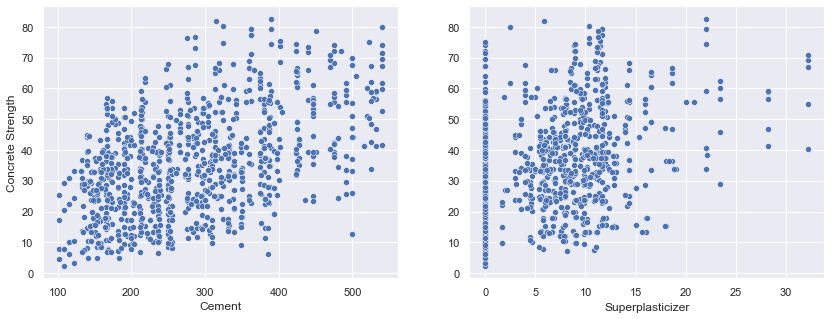

In [8]:
# Scatter plot for the concrete strength and some variables
plt.figure(figsize= (14, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(y= 'Concrete Strength', x= 'Cement', data= df)

plt.subplot(1, 2, 2)
sns.scatterplot(y= 'Concrete Strength', x= 'Superplasticizer', data= df)
plt.ylabel('')
plt.savefig('scatter.pdf')
plt.show()

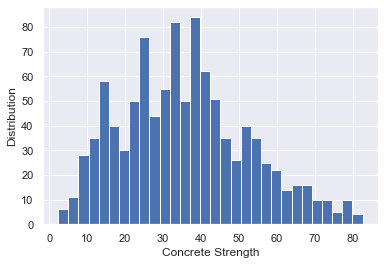

In [9]:
# The concrete strength hostogram
plt.hist(df['Concrete Strength'], bins= 30)
plt.xlabel('Concrete Strength')
plt.ylabel('Distribution')
plt.savefig('hist.pdf')

plt.show()

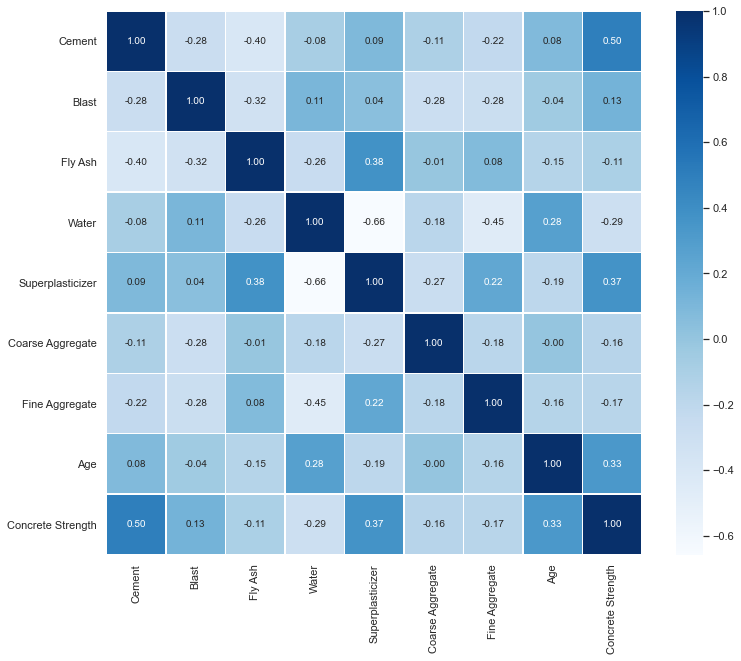

In [10]:
# Heatmap of the variables
correlation_matrix= df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt=".2f", linewidths=0.5, annot_kws={"size": 10})
plt.savefig('heatmap.pdf')
plt.show()

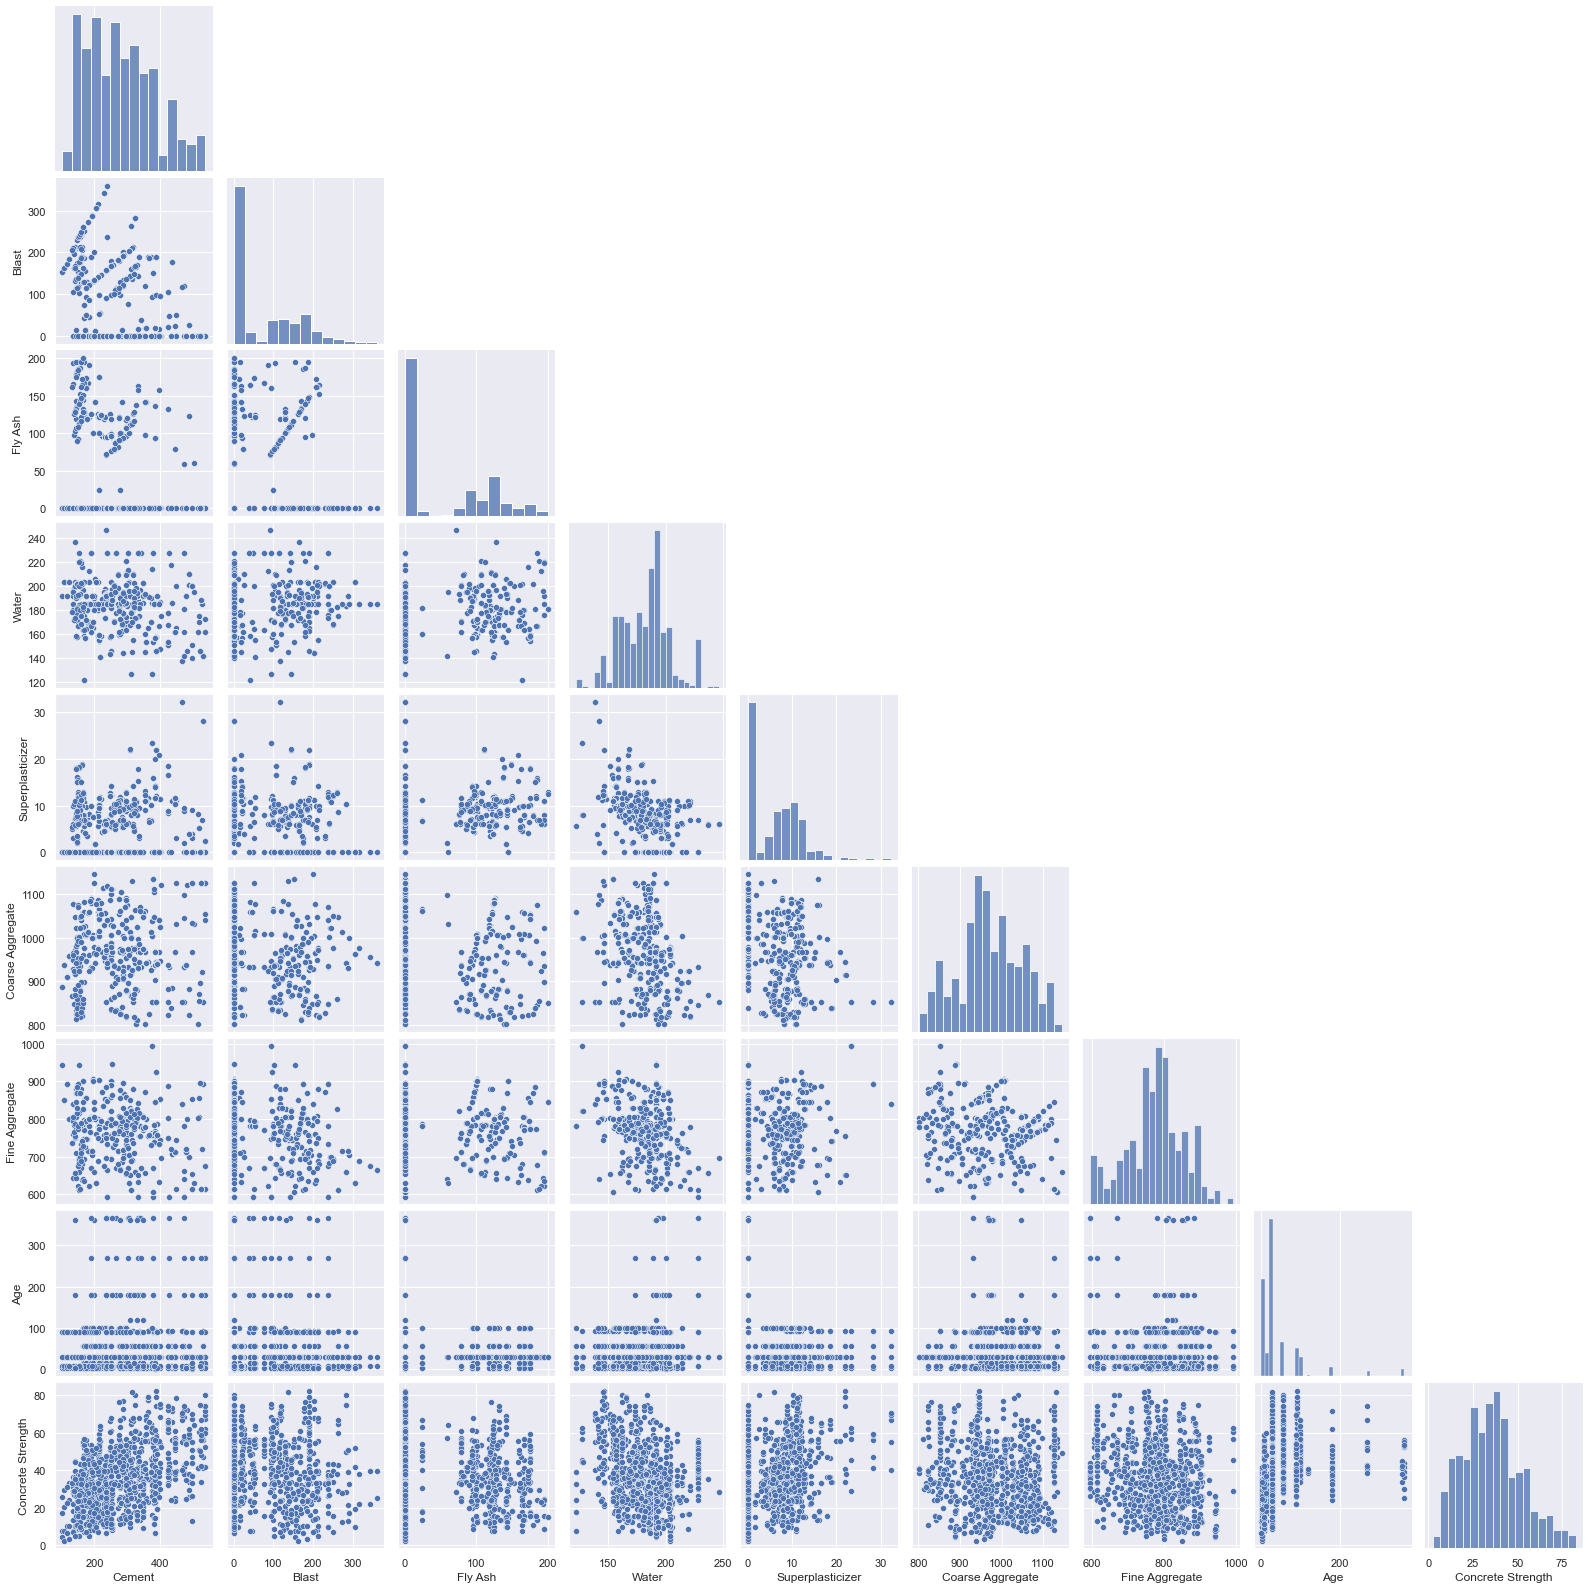

In [11]:
# Pairplot of the all varibales
sns.pairplot(df, corner= True)
plt.savefig('pairplot.pdf')
plt.show()

# Task 2

In [12]:
# Fitting regression

degree = 2
poly = PolynomialFeatures(degree=degree, include_bias=False)
X_poly = poly.fit_transform(df[['Age']])
poly_feature_names = poly.get_feature_names_out(['Age'])
other_independent_vars = df[['Cement', 'Blast', 'Fly Ash', 'Water', 'Superplasticizer',
                             'Coarse Aggregate', 'Fine Aggregate']]
X_poly_df = pd.DataFrame(X_poly, columns=poly_feature_names)
X = pd.concat([other_independent_vars, X_poly_df], axis=1)
y= df['Concrete Strength']

In [13]:
poly_feature_names

array(['Age', 'Age^2'], dtype=object)

In [14]:
X.shape

(1030, 9)

In [15]:
# Regression fit Method 1:
model= LinearRegression()
model.fit(X, y)

LinearRegression()

In [16]:
print(model.intercept_)
print(model.coef_)

-3.6025507498985547
[ 0.11357399  0.09555718  0.07403056 -0.17426543  0.19797548  0.008135
  0.01000205  0.35293482 -0.00081373]


In [17]:
# Regression fit Method 2
X= sm.add_constant(X)

model= sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Concrete Strength   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     328.3
Date:                Thu, 25 Jan 2024   Prob (F-statistic):          4.95e-294
Time:                        19:47:07   Log-Likelihood:                -3660.7
No. Observations:                1030   AIC:                             7341.
Df Residuals:                    1020   BIC:                             7391.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -3.6026     21.748     -0.166      0.868     -46.278      39.073
Cement               0.1136      0.007     16.356      0.000       0.100       0.127
Blast                0.0956      0.008     11.523      0.000       0.079       0.112
Fly Ash              0.0740      0.010      7.184      0.000       0.054       0.094
Water               -0.1743      0.033     -5.304      0.000      -0.239      -0.110
Superplasticizer     0.1980      0.076      2.588      0.010       0.048       0.348
Coarse Aggregate     0.0081      0.008      1.058      0.290      -0.007       0.023
Fine Aggregate       0.0100      0.009      1.142      0.254      -0.007       0.027
Age                  0.3529      0.011     30.750      0.000       0.330       0.375
Age^2               -0.0008   3.61e-05    -22.550      0.000      -0.001      -0.001
==============================================================================
Omnibus:                       14.459   Durbin-Watson:                   1.280
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               20.142
Skew:                           0.144   Prob(JB):                     4.23e-05
Kurtosis:                       3.621   Cond. No.                     1.73e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.73e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Task 3

In [18]:
df.head()

,Cement,Blast,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [19]:
df3= df.drop('Concrete Strength', axis= 1)
y= df['Concrete Strength']
df3.head()

,Cement,Blast,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [20]:
# Best subset selection method
def best_subset_selection(X, y, criterion='aic'):
    features = list(X.columns)
    best_model = None
    best_subset = None
    best_criterion_value = float('inf') if criterion in ['aic', 'bic'] else 0.0
    
    for k in range(1, len(features) + 1):
        subsets = combinations(features, k)
        
        for subset in subsets:
            X_temp = sm.add_constant(X[list(subset)])
            model = sm.OLS(y, X_temp).fit()
            
            if criterion == 'aic':
                criterion_value = model.aic
            elif criterion == 'bic':
                criterion_value = model.bic
            elif criterion == 'rsquared_adj':
                criterion_value = model.rsquared_adj
            
            if (criterion == 'aic' or criterion == 'bic') and criterion_value < best_criterion_value:
                best_model = model
                best_subset = subset
                best_criterion_value = criterion_value
            elif criterion != 'aic' and criterion != 'bic' and criterion_value > best_criterion_value:
                best_model = model
                best_subset = subset
                best_criterion_value = criterion_value
    
    return best_subset

# Initiating the method with three criterion
selected_features_aic = best_subset_selection(df3, y, criterion='aic')
selected_features_bic = best_subset_selection(df3, y, criterion='bic')
selected_features_adj_r2 = best_subset_selection(df3, y, criterion='rsquared_adj')

# Print of the selected features based on the chosen criterion
print("Selected features (AIC):", selected_features_aic)
print("Selected features (BIC):", selected_features_bic)
print("Selected features (Adjusted R-squared):", selected_features_adj_r2)


Selected features (AIC): ('Cement', 'Blast', 'Fly Ash', 'Water', 'Superplasticizer', 'Age')
Selected features (BIC): ('Cement', 'Blast', 'Fly Ash', 'Water', 'Superplasticizer', 'Age')
Selected features (Adjusted R-squared): ('Cement', 'Blast', 'Fly Ash', 'Water', 'Superplasticizer', 'Coarse Aggregate', 'Fine Aggregate', 'Age')


In [21]:
selected_features= list(selected_features_bic)
df3[selected_features]

,Cement,Blast,Fly Ash,Water,Superplasticizer,Age
0,540.0,0.0,0.0,162.0,2.5,28
1,540.0,0.0,0.0,162.0,2.5,28
2,332.5,142.5,0.0,228.0,0.0,270
3,332.5,142.5,0.0,228.0,0.0,365
4,198.6,132.4,0.0,192.0,0.0,360
...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,28
1026,322.2,0.0,115.6,196.0,10.4,28
1027,148.5,139.4,108.6,192.7,6.1,28
1028,159.1,186.7,0.0,175.6,11.3,28


In [22]:
# Fitting regression method using selected features
X3= sm.add_constant(df3[selected_features])

model3= sm.OLS(y, X3).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Concrete Strength   R-squared:                       0.614
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     271.2
Date:                Thu, 25 Jan 2024   Prob (F-statistic):          1.78e-207
Time:                        19:47:08   Log-Likelihood:                -3871.0
No. Observations:                1030   AIC:                             7756.
Df Residuals:                    1023   BIC:                             7791.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               29.0302      4.212      6.891      0.000      20.764      37.296
Cement               0.1054      0.004     24.821      0.000       0.097       0.114
Blast                0.0865      0.005     17.386      0.000       0.077       0.096
Fly Ash              0.0687      0.008      8.881      0.000       0.054       0.084
Water               -0.2183      0.021    -10.332      0.000      -0.260      -0.177
Superplasticizer     0.2390      0.085      2.826      0.005       0.073       0.405
Age                  0.1135      0.005     20.987      0.000       0.103       0.124
==============================================================================
Omnibus:                        5.233   Durbin-Watson:                   1.286
Prob(Omnibus):                  0.073   Jarque-Bera (JB):                5.193
Skew:                          -0.174   Prob(JB):                       0.0745
Kurtosis:                       3.019   Cond. No.                     4.66e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Task 4

In [23]:
X3.head()

,const,Cement,Blast,Fly Ash,Water,Superplasticizer,Age
0,1.0,540.0,0.0,0.0,162.0,2.5,28
1,1.0,540.0,0.0,0.0,162.0,2.5,28
2,1.0,332.5,142.5,0.0,228.0,0.0,270
3,1.0,332.5,142.5,0.0,228.0,0.0,365
4,1.0,198.6,132.4,0.0,192.0,0.0,360


In [24]:
# check for multicolinearity
vif_data = pd.DataFrame()
vif_data["Feature"] = X3.columns
vif_data["VIF"] = [variance_inflation_factor(X3.values, i) for i in range(X3.shape[1])]

# Display the VIF data
print(vif_data)

            Feature         VIF
0             const  168.666402
1            Cement    1.871116
2             Blast    1.749429
3           Fly Ash    2.327616
4             Water    1.933207
5  Superplasticizer    2.424282
6               Age    1.108110


In [25]:
# Calculate residuals
residuals3 = model3.resid

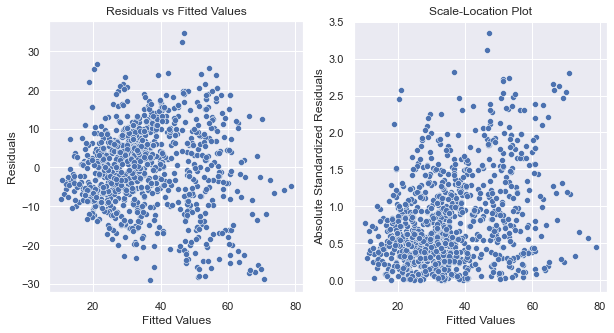

In [26]:
plt.figure(figsize= (10, 5))
# Scatter plot of predicted values vs. residuals, plot for linearity
plt.subplot(1, 2, 1)
sns.scatterplot(x=model3.fittedvalues, y=residuals3)
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')

# Residual plot for heteroskedasticity
plt.subplot(1, 2, 2)
sns.scatterplot(x=model3.fittedvalues, y=np.abs(model3.get_influence().resid_studentized_internal))
plt.title('Scale-Location Plot')
plt.xlabel('Fitted Values')
plt.ylabel('Absolute Standardized Residuals')
plt.savefig('residuals-heteroskedasticity.pdf')
plt.show()

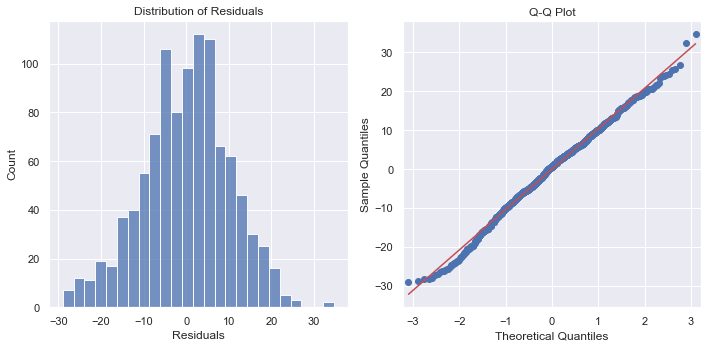

In [27]:
# Residual plot for normality, distribution of Residuals:
plt.figure(figsize= (10, 5))
plt.subplot(1, 2, 1)
sns.histplot(residuals3)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')

# Q-Q plot (Quantile-Quantile plot)
plt.subplot(1, 2, 2)
sm.qqplot(residuals3, line='s', ax=plt.gca())
plt.title('Q-Q Plot')
plt.savefig('residual-normality.pdf')
plt.tight_layout()
plt.show()